# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID',)

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice.
mouse_count = mouse_study['Mouse ID'].unique()
mouse_count = len(mouse_count)
mouse_count

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint'], keep=False)]                                            

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study['Mouse ID']!='g989']
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_mouse = clean_mouse_study['Mouse ID'].unique()
clean_mouse_count = len(clean_mouse)
clean_mouse_count

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tum_vol = clean_mouse_study.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
med_tum_vol = clean_mouse_study.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var_tum_vol = clean_mouse_study.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_tum_vol = clean_mouse_study.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_tum_vol = clean_mouse_study.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({"Mean Tumor Vol": mean_tum_vol,"Median Tum Vol": med_tum_vol,"Tum Vol Variance": var_tum_vol,"Tum Vol Std.Dev.": std_tum_vol, 
                              "Tumor Vol Std.Err.": sem_tum_vol})

summary_stats

,Mean Tumor Vol,Median Tum Vol,Tum Vol Variance,Tum Vol Std.Dev.,Tumor Vol Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
another_summary = clean_mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
another_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


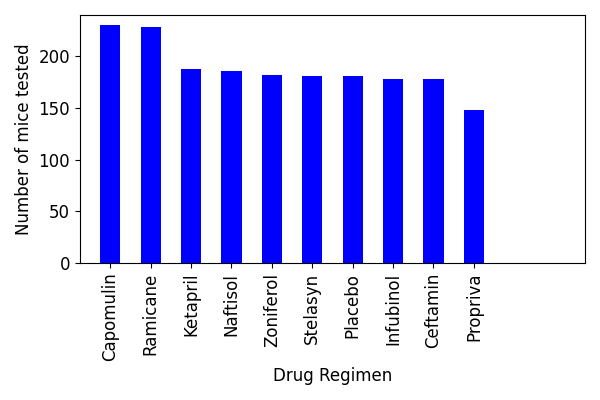

In [31]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
                
drug_mice= clean_mouse_study.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
drug_mice.plot.bar(figsize=(6,4), color='b', fontsize= 12)
plt.xlabel('Drug Regimen', fontsize= 12)
plt.ylabel('Number of mice tested', fontsize= 12)
plt.xlim(-0.75, len('Drug Regimen')-0.25)
plt.tight_layout()             
                 

<IPython.core.display.Javascript object>


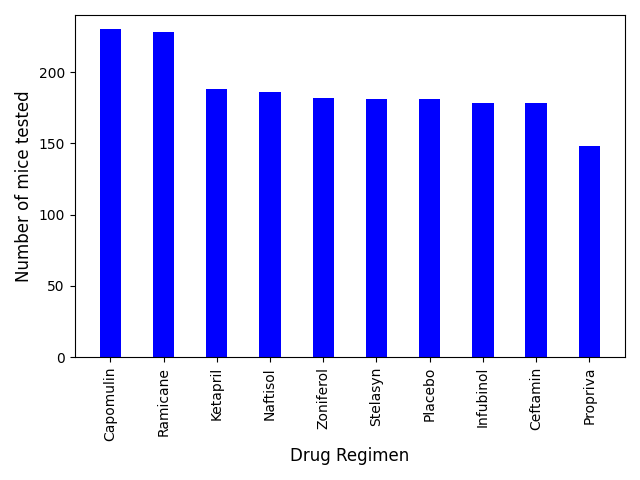

<function matplotlib.pyplot.show(block=None)>

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_mice= clean_mouse_study.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
mice_list = drug_mice.tolist()
mice_list

drug_mice_df= drug_mice.to_frame()
drug_mice_df1 = drug_mice_df.reset_index()
drug_list = drug_mice_df1['Drug Regimen'].tolist()
drug_list

plt.bar(drug_list, mice_list, color='b', width=0.4)
plt.xticks(rotation='vertical')
plt.ylim(0, max(mice_list)+10)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of mice tested', fontsize=12)
plt.tight_layout()
plt.show


<IPython.core.display.Javascript object>


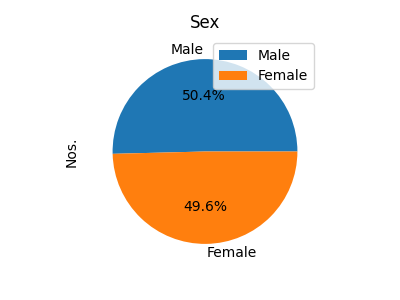

<AxesSubplot:title={'center':'Sex'}, ylabel='Nos.'>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_of_mouse = clean_mouse_study[['Mouse ID','Sex']]
sex_of_mouse = sex_of_mouse.drop_duplicates()

male_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Male']
male_mouse_count = male_mouse['Sex'].count()
male_mouse_count

female_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Female']
female_mouse_count= female_mouse['Sex'].count()

df=pd.DataFrame([{'Sex':'Male', 'Nos.': male_mouse_count}, {'Sex':'Female', 'Nos.': female_mouse_count}])
df.plot.pie(title= 'Sex', y='Nos.',figsize=(4,3),labels=['Male','Female'],autopct='%1.1f%%')

<IPython.core.display.Javascript object>


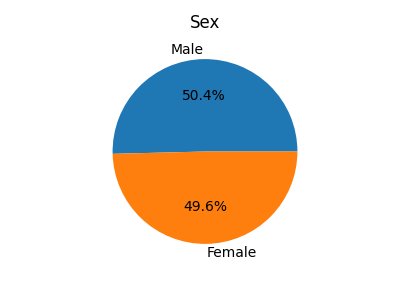

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Male']
male_mice = male_mouse['Sex'].count()

female_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Female']
female_mice= female_mouse['Sex'].count()

newdf=pd.DataFrame([{'Sex':'Male', 'Nos.': male_mice}, {'Sex':'Female', 'Nos.': female_mice}])
y= np.array([male_mice, female_mice])

fig=plt.figure(figsize=(4,3))
plt.pie(y, labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs=clean_mouse_study.loc[(clean_mouse_study['Drug Regimen']=='Capomulin')|
                                   (clean_mouse_study['Drug Regimen']=='Ramicane')|
                                   (clean_mouse_study['Drug Regimen']=='Infubinol')|
                                   (clean_mouse_study['Drug Regimen']=='Ceftamin'),:]
        
# Start by getting the last (greatest) timepoint for each mouse
four_drugs=four_drugs.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_drugs=pd.merge(four_drugs,clean_mouse_study[['Mouse ID','Timepoint','Tumor Volume (mm3)']],
                    on=['Mouse ID','Timepoint'], how='left')

four_drugs


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [113]:
# Put treatments into a list for for loop (and later for plot labels)

treats=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[]for i in range(4)]
for x in range(100):
        drug= four_drugs.iloc[x,:]['Drug Regimen']
        tum= four_drugs.iloc[x,:]['Tumor Volume (mm3)']
        for y in range(4):
            if drug==treats[y]:
                Tumors[y].append(tum)
                continue
                      
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1= [[] for i in range(4)]
q3= [[] for i in range(4)] 
qrt=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower=[[] for i in range(4)]
upper=[[] for i in range(4)] 
pot_outls=[[] for i in range(4)]

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for n, num in enumerate(treats):
    quartiles[n] = four_drugs.loc[four_drugs["Drug Regimen"]==num,:]["Tumor Volume (mm3)"].quantile([.25,0.5,.75])
    lower[n] = quartiles [n][0.25]
    upper[n] = quartiles [n][0.75]
    iqr[n] = upper[n]-lower[n]   
          
# Determine outliers using upper and lower bounds


print(f"The lower quartile of {num} tumor volume is: {lower[n]}")
print(f"The upper quartile of {num} tumor volume is: {upper[n]}")
print(f"The interquartile range of {num} tumor volume is: {iqr[n]}")
print(f"The the median of {num} tumor volume is: {quartiles[n][0.5]}") 


lower_limit[n] = lower[n] - (1.5*iqr[n])
upper_limit[n] = upper[n] + (1.5*iqr[n])
print(f"Values below {lower_limit[n]} could be outliers.")
print(f"Values above {upper_limit[n]} could be outliers.")




The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The the median of Ceftamin tumor volume is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

